## Medical Appointment no show prediction
### By : Lisa McFadden, Lidia Soto, Natalie Rodriguez

### Import libraries required for analysis and models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import time
import datetime as dt
from datetime import datetime


### Import data and look at your data content

In [2]:
data = pd.read_csv('No-show-Issue-Comma-300k.csv')
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


### DATA PROCESSING


### Renaming Columns
#### From looking at the data head we can see some of the columns are spelled incorrectly the code below will fix this 

In [3]:
data.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [4]:
print(data.columns)

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')


### Checking for Blanks

In [5]:
data.isnull().any()

Age                        False
Gender                     False
AppointmentRegistration    False
AppointmentData            False
DayOfTheWeek               False
Status                     False
Diabetes                   False
Alchoholism                False
Hypertension               False
Handicap                   False
Smokes                     False
Scholarship                False
Tuberculosis               False
Sms_Reminder               False
AwaitingTime               False
dtype: bool

### Converting the AppointmentRegistration and AppointmentData into a date and time format 

In [6]:
data['AppointmentRegistration'] = pd.to_datetime(data['AppointmentRegistration'])
data['AppointmentData'] = pd.to_datetime(data['AppointmentData'])

### Extract month from the appointments

In [7]:
data['AppointmentMonths'] = data['AppointmentData'].apply(lambda x : dt.datetime.strftime(x, '%B'))

In [8]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentMonths
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,January
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,August
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,February
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,August
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,October


In [9]:
data.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [10]:
data = data[(data['Age'] < 100) & (data['Age'] > 0)] ## drop all ages more than 100 and less than 0 
data.AwaitingTime = data.AwaitingTime.apply(abs)

In [11]:
data.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000
mean,39.148517,0.080748,0.025905,0.223536,0.021227,0.054241,0.099364,0.000459,0.575284,13.753272
std,22.035217,0.272448,0.158853,0.416615,0.158558,0.226494,0.299151,0.021424,0.499705,15.630098
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,99.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,398.000000


## Preliminary questions answered by data visualization
### 1.Who skips the doctor more often?
#### Below we observe more females miss appointments but this does not completly answer our question, the data contains more entried for females than males.


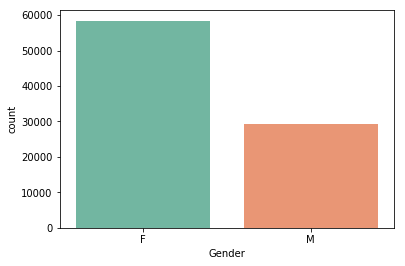

In [13]:

visits = data[data['Status'] == 'No-Show']
sns.countplot(x='Gender', data=visits)

### 2. what is the proportion of male & female?
#### We can see there is a higer portion of women on the dataset

In [14]:

data['Gender'].value_counts(normalize = True)

F    0.674527
M    0.325473
Name: Gender, dtype: float64

### Visualise male vs female distribution

(-1.106186393288021,
 1.1002945901565724,
 -1.1060981953800797,
 1.103556809187218)

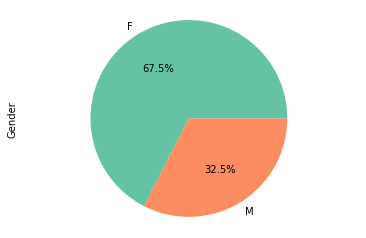

In [15]:

fig, pie = plt.subplots()
data['Gender'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%')
pie.axis('equal')

### 3. What is the proportion of missing the appointment whether the patient is male or female?

#### Although females made up more of the patient population in the dataset, roughly similar proportions of males and females showed up for their appointments.

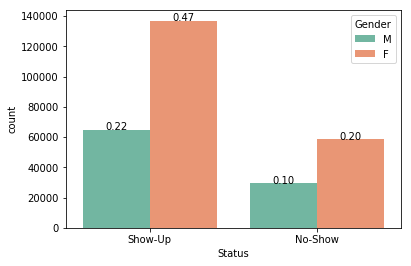

In [16]:
x = sns.countplot(x='Status', hue='Gender', data=data)
# to plot the values over the labels
total = float(len(data))
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')

### 4. in which month most patients miss their appointments
####  fewer appointments occurred over the North America winter months but the number of no-shows was fairly stable from month-to-month.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

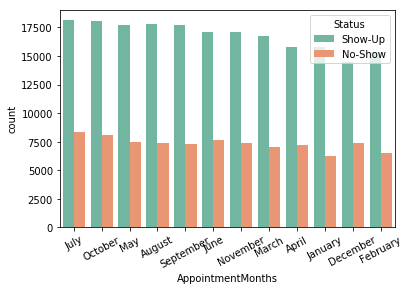

In [17]:
sns.countplot(x='AppointmentMonths', hue='Status', data=data, order = data['AppointmentMonths'].value_counts().index)
plt.xticks(rotation=28)

### 5. In which day the patients visit their doctors most frequently?

#### The majority of appointments were during the week with the peak number of appointments occurring on Tuesday and Wednesday.  

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

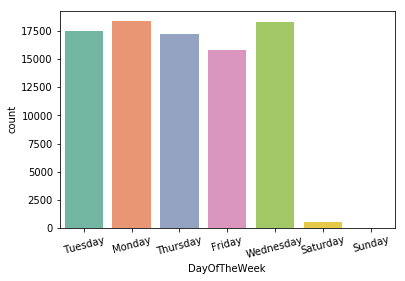

In [18]:

sns.countplot(x='DayOfTheWeek', data=visits)
plt.xticks(rotation=15)

### 6. is there specific weekday when most patients miss their appointments?
 
#### The result show Monday is the day with the highest no show count

In [19]:
miss = data[data['Status'] == 'No-Show']
miss.groupby('DayOfTheWeek')['Status'].count().sort_values(ascending=False)

DayOfTheWeek
Monday       18402
Wednesday    18286
Tuesday      17524
Thursday     17243
Friday       15801
Saturday       512
Sunday           1
Name: Status, dtype: int64

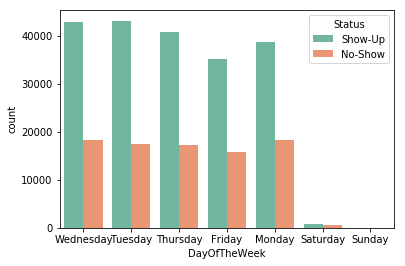

In [20]:
sns.countplot(x='DayOfTheWeek', hue='Status', data=data)

###  7. Do men and women visit the doctor on the same days?
#### Taking into consideration there are more women samples it seems pretty even that men and women visit the doctor

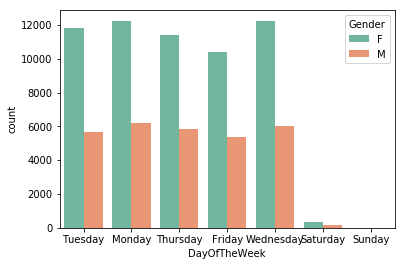

In [21]:
sns.countplot(x='DayOfTheWeek', hue='Gender', data=visits)

### 8. how likely patients come to their scheduled appointment if they have received a sms
#### in the graph below it seems like SMS does not have much effect on patient showing up to their appointment

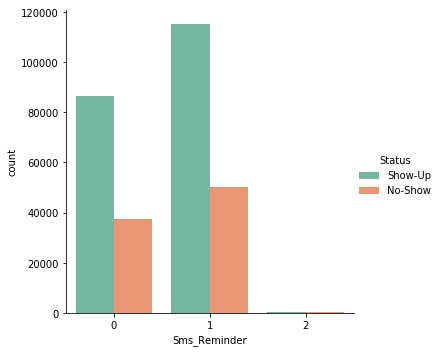

In [22]:

sns.catplot('Sms_Reminder', hue='Status', data=data, kind='count')

### 8.Next the feature variables were visualized with the target variable of appointment status

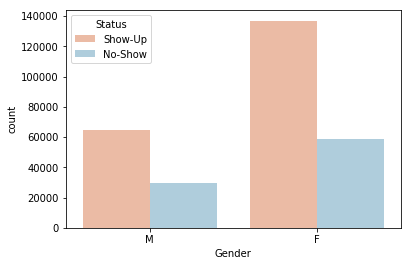

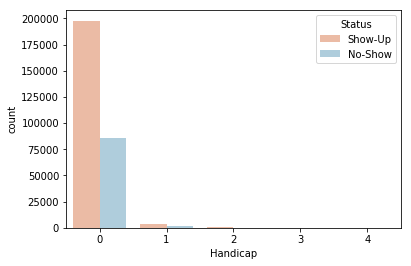

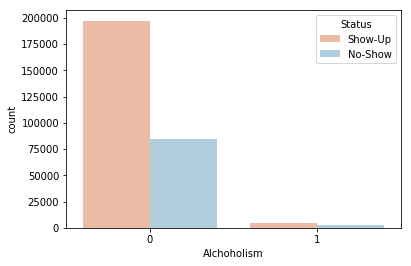

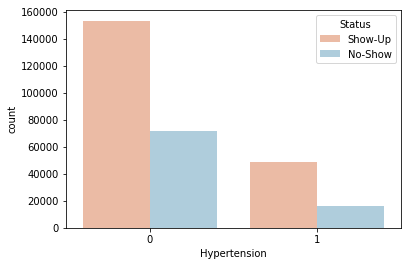

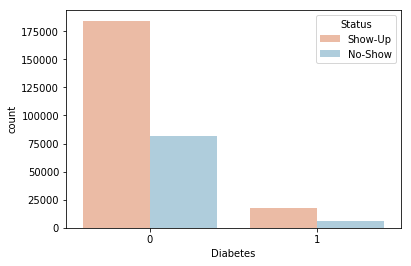

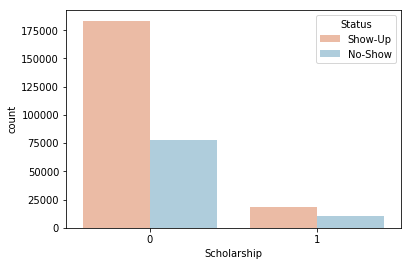

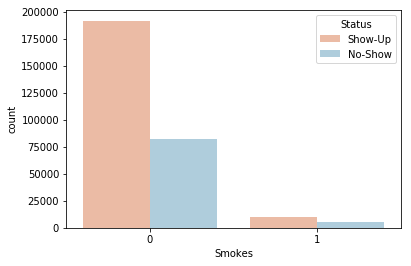

In [18]:
sns.countplot(x='Gender', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Handicap', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Alchoholism', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Hypertension', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Diabetes', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Scholarship', hue='Status', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Smokes', hue='Status', data=data, palette='RdBu')
plt.show();

### Below We identify the total amount of patient i n our data set to use on the function below
### Then we use a  function what will calculate all percentages of:     
* Scholarship
* Hypertension
* Diabetes
* Alchoholism
* Smokes
* Status (males & Females) 


In [24]:
total_of_patients=len(data)

In [25]:
def calculate_percentage(name,data):
  
    if name == 'Status':
        yes, no = data[name].value_counts()
        print('percentage of patients no show: {}%'.format(no/total_of_patients*100))
        print('percentage of patients Show up : {}%'.format(yes/total_of_patients*100))
    else:
        not_have, have = data[name].value_counts()
        print('percentage of patients not have {} : {}%'.format(name,not_have/total_of_patients*100))
        print('percentage of patients have {} : {}%'.format(name,have/total_of_patients*100))

In [26]:
columns=['Scholarship','Hypertension','Diabetes','Alchoholism','Smokes','Status']
for name in columns:
    calculate_percentage(name,data)

percentage of patients not have Scholarship : 90.06356363787026%
percentage of patients have Scholarship : 9.936436362129744%
percentage of patients not have Hypertension : 77.64638453756677%
percentage of patients have Hypertension : 22.353615462433236%
percentage of patients not have Diabetes : 91.92524280895347%
percentage of patients have Diabetes : 8.074757191046539%
percentage of patients not have Alchoholism : 97.40946238489664%
percentage of patients have Alchoholism : 2.5905376151033557%
percentage of patients not have Smokes : 94.57585686615037%
percentage of patients have Smokes : 5.424143133849622%
percentage of patients no show: 30.30373129948106%
percentage of patients Show up : 69.69626870051894%


Text(0.5, 1.0, 'Correlation Matrix for Appointment Data')

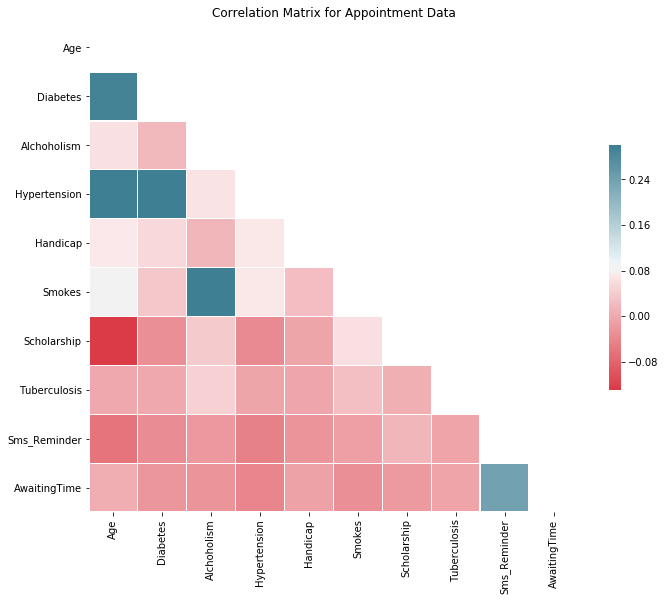

In [19]:
# View correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Matrix for Appointment Data')


### Cleaning data into numeric form
### Convert  F =0, M=1
### Convert no-show status to numbers no-show =0 , show =1

In [12]:
data['Gender'] = data.Gender.apply(lambda x: 0 if(x=='F') else 1)
data['Status'] = data.Status.apply(lambda x: 0 if(x=='No-Show') else 1)
data['Handicap'] = data['Handicap'].apply(lambda x: 2 if x > 2 else x)

### Show a sample of the data after numeric enncoding is applied

In [13]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentMonths
0,19,1,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,29,January
1,24,0,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,1,August
2,4,0,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,0,1,February
3,5,1,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,1,0,0,0,0,0,0,0,1,15,August
4,38,1,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,1,6,October


### Perform Shapiro-Wilk Test

In [29]:

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
Column = data['Age']
# normality test
stat, p = shapiro(Column)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
     print('Sample looks Gaussian (fail to reject H0)')
else:
     print('Sample does not look Gaussian (reject H0)')

Statistics=0.975, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 ### Anderson-Darling Test

In [30]:

from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)

# normality test
result = anderson(data['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1691.726
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


### QQ Plot

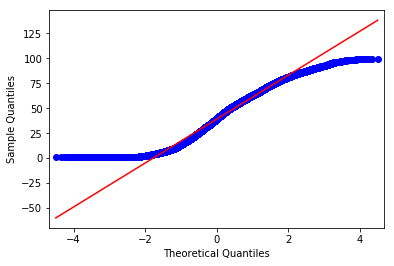

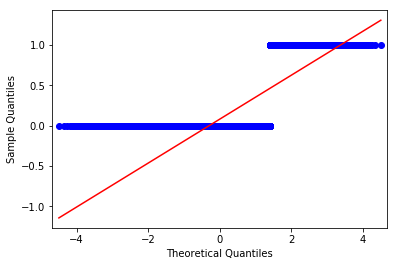

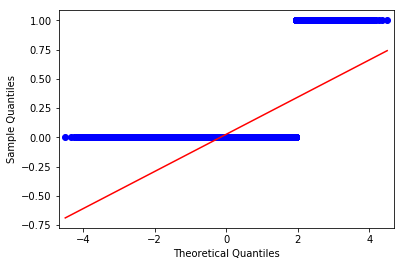

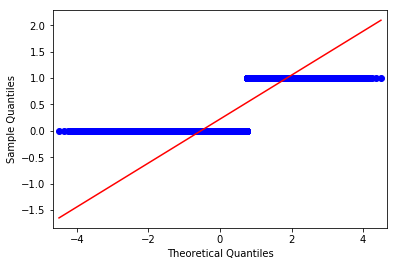

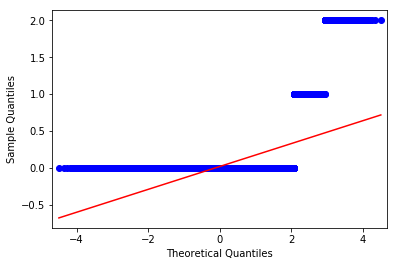

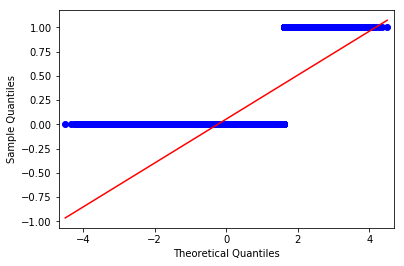

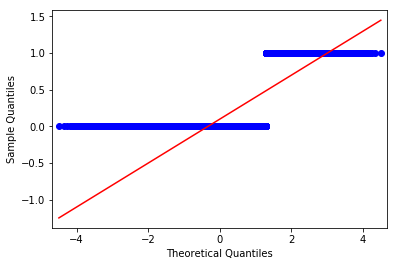

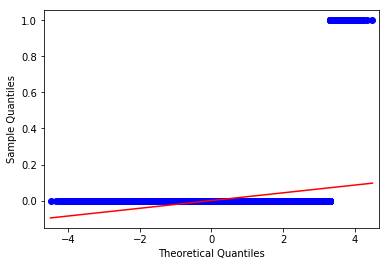

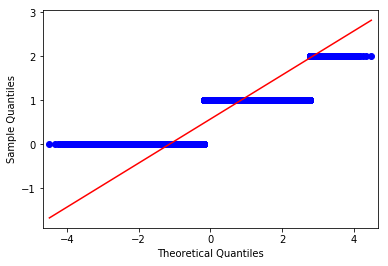

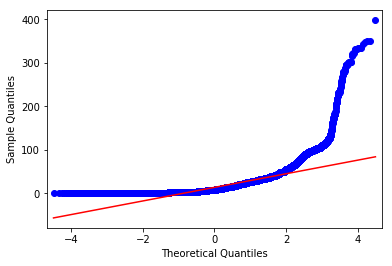

In [31]:

from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)

# q-q plot
qqplot(data['Age'], line='s')
pyplot.show()
qqplot(data['Diabetes'], line='s')
pyplot.show()
qqplot(data['Alchoholism'], line='s')
pyplot.show()
qqplot(data['Hypertension'], line='s')
pyplot.show()
qqplot(data['Handicap'], line='s')
pyplot.show()
qqplot(data['Smokes'], line='s')
pyplot.show()
qqplot(data['Scholarship'], line='s')
pyplot.show()
qqplot(data['Tuberculosis'], line='s')
pyplot.show()
qqplot(data['Sms_Reminder'], line='s')
pyplot.show()
qqplot(data['AwaitingTime'], line='s')
pyplot.show()

In [32]:
from scipy import stats
# Print the p values
print (stats.shapiro(data['Age']))
print (stats.shapiro(data['Diabetes']))
print (stats.shapiro(data['Alchoholism']))
print (stats.shapiro(data['Hypertension']))
print (stats.shapiro(data['Handicap']))
print (stats.shapiro(data['Smokes']))
print (stats.shapiro(data['Scholarship']))
print (stats.shapiro(data['Tuberculosis']))
print (stats.shapiro(data['Sms_Reminder']))
print (stats.shapiro(data['AwaitingTime']))


(0.9748837947845459, 0.0)
(0.3020336627960205, 0.0)
(0.14369183778762817, 0.0)
(0.5149232149124146, 0.0)
(0.11473935842514038, 0.0)
(0.23602724075317383, 0.0)
(0.34110039472579956, 0.0)
(0.005878150463104248, 0.0)
(0.6438608169555664, 0.0)
(0.7198482751846313, 0.0)


C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\s

C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\lidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__'

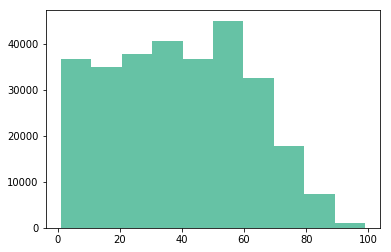

In [33]:
#logcolumns = ['Age','Diabetes','Alchoholism','Hypertension','Handicap','Smokes','Scholarship','Tuberculosis','Sms_Reminder','AwaitingTime']
data['log_Age'] = np.log(data['Age'])
data['log_Diabetes'] = np.log(data['Diabetes'])
data['log_Alchoholism'] = np.log(data['Alchoholism'])
data['log_Hypertension'] = np.log(data['Hypertension'])
data['log_Handicap'] = np.log(data['Handicap'])
data['log_Smokes'] = np.log(data['Smokes'])
data['log_Scholarship'] = np.log(data['Scholarship'])
data['log_Tuberculosis'] = np.log(data['Tuberculosis'])
data['log_Sms_Reminder'] = np.log(data['Sms_Reminder'])
data['log_AwaitingTime'] = np.log(data['AwaitingTime'])



#different values of lambda were tried to find best fit for qq plot for age. SQrt was better tranformation 
#than Log as it fit the QQ plt better
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)


# power transform
data['sqrt_Age'] = boxcox(data['Age'], 0.5)
# histogram
pyplot.hist(data['Age'])
pyplot.show()


#Awaitingtime- tried lambda values -0.5,0.5,-1 but none resulted in fitting qqplot as good as LOG (0)
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)


# power transform
data['sqrt_AwaitingTime'] = boxcox(data['AwaitingTime'],0.5)


C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:195: RuntimeWarning: invalid value encountered in subtract
  scale = np.sqrt(((data - loc)**2).mean())
C:\Users\lidit\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


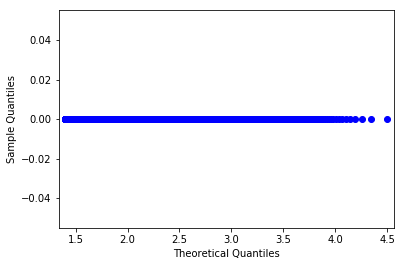

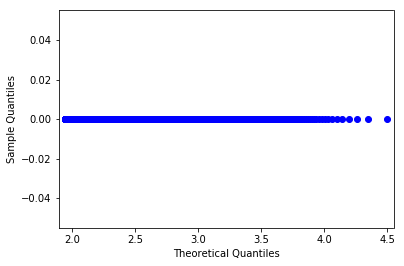

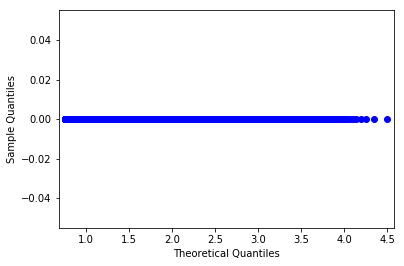

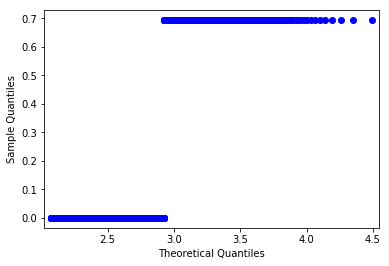

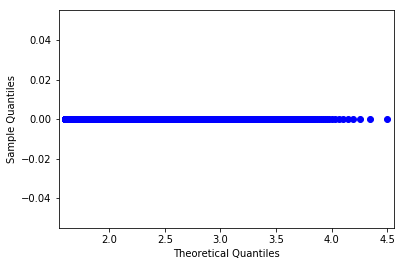

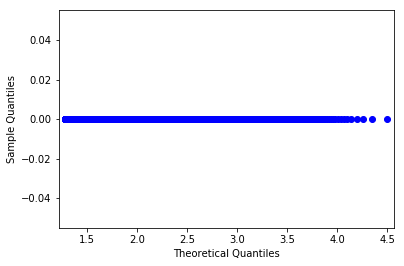

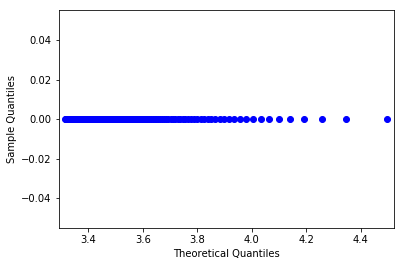

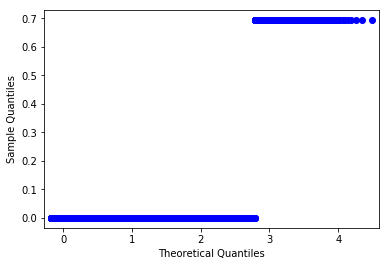

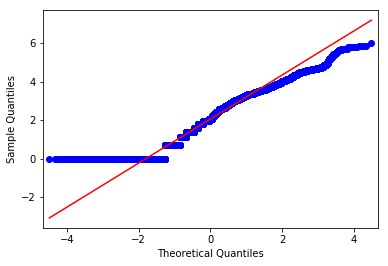

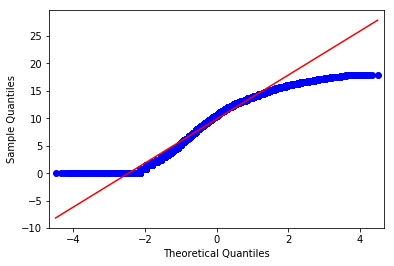

In [34]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)

# q-q plot
# not used; sqrt yielded better plot;qqplot(data['log_Age'], line='s')pyplot.show()
qqplot(data['log_Diabetes'], line='s')
pyplot.show()
qqplot(data['log_Alchoholism'], line='s')
pyplot.show()
qqplot(data['log_Hypertension'], line='s')
pyplot.show()
qqplot(data['log_Handicap'], line='s')
pyplot.show()
qqplot(data['log_Smokes'], line='s')
pyplot.show()
qqplot(data['log_Scholarship'], line='s')
pyplot.show()
qqplot(data['log_Tuberculosis'], line='s')
pyplot.show()
qqplot(data['log_Sms_Reminder'], line='s')
pyplot.show()
qqplot(data['log_AwaitingTime'], line='s')
pyplot.show()
qqplot(data['sqrt_Age'], line='s')
pyplot.show()
#not used; LOG yielded better plot;qqplotqqplot(data['sqrt_AwaitingTime'], line='s')pyplot.show()


In [35]:
from scipy import stats
# Print the p values
print (stats.shapiro(data['log_Age']))
print (stats.shapiro(data['log_Diabetes']))
print (stats.shapiro(data['log_Alchoholism']))
print (stats.shapiro(data['log_Hypertension']))
print (stats.shapiro(data['log_Handicap']))
print (stats.shapiro(data['log_Smokes']))
print (stats.shapiro(data['log_Scholarship']))
print (stats.shapiro(data['log_Tuberculosis']))
print (stats.shapiro(data['log_Sms_Reminder']))
print (stats.shapiro(data['log_AwaitingTime']))
print (stats.shapiro(data['sqrt_Age']))

C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\s

(0.8507645130157471, 0.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(0.965478241443634, 0.0)
(0.9623261094093323, 0.0)


C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lidit\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
#checked for missing data 
data.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
AppointmentData            0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alchoholism                0
Hypertension               0
Handicap                   0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
AppointmentMonths          0
dtype: int64

In [15]:
##Dummy code the Day and Month Variable

from sklearn.model_selection import cross_validate
y = data.Status
X = data.drop(columns=['Status', 'AppointmentRegistration', 'AppointmentData'], axis=1)
X=pd.get_dummies(X, columns=['DayOfTheWeek', 'AppointmentMonths'], prefix=['DayOfTheWeek', 'AppointmentMonths'])




In [16]:
##Removing multicollinearity

X = X.drop(columns=['DayOfTheWeek_Sunday', 'AppointmentMonths_January'], axis=1)

In [17]:
#checked for missing data 
X.isnull().sum()

Age                            0
Gender                         0
Diabetes                       0
Alchoholism                    0
Hypertension                   0
Handicap                       0
Smokes                         0
Scholarship                    0
Tuberculosis                   0
Sms_Reminder                   0
AwaitingTime                   0
DayOfTheWeek_Friday            0
DayOfTheWeek_Monday            0
DayOfTheWeek_Saturday          0
DayOfTheWeek_Thursday          0
DayOfTheWeek_Tuesday           0
DayOfTheWeek_Wednesday         0
AppointmentMonths_April        0
AppointmentMonths_August       0
AppointmentMonths_December     0
AppointmentMonths_February     0
AppointmentMonths_July         0
AppointmentMonths_June         0
AppointmentMonths_March        0
AppointmentMonths_May          0
AppointmentMonths_November     0
AppointmentMonths_October      0
AppointmentMonths_September    0
dtype: int64

In [18]:
##Split into train, test, and validate

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,train_size=0.8)


#splitting data into 60% as train/20% as test/20% as validate
X_validate, X_train, y_validate, y_train  = train_test_split(X_trainval, y_trainval, train_size=0.25)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
#Shape of train/test/Validate data
print(X_test.shape)
print(X_validate.shape)
print(X_train.shape)

(57927, 28)
(57926, 28)
(173778, 28)


In [21]:
##Scaler transformation of the x variables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scale=scaler.fit_transform(X_train)
X_trainval_scale=scaler.fit_transform(X_trainval)
X_validate_scale=scaler.fit_transform(X_validate)
X_test_scale=scaler.fit_transform(X_test)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were

In [22]:
###Checking Scaling

from scipy import stats
stats.describe(X_train_scale)


DescribeResult(nobs=173778, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])), mean=array([0.38868175, 0.32615751, 0.08030361, 0.02566493, 0.22233539,
       0.01036955, 0.05455811, 0.09972494, 0.00043159, 0.28778672,
       0.03226351, 0.17714555, 0.19764872, 0.00471291, 0.19963402,
       0.20945114, 0.21139039, 0.0794577 , 0.08719746, 0.07563098,
       0.07572305, 0.09100116, 0.08588544, 0.08174798, 0.08647815,
       0.08417061, 0.09052354, 0.08574733]), variance=array([0.05058669, 0.21978005, 0.07385536, 0.02500638, 0.17290336,
       0.00598073, 0.05158182, 0.08978039, 0.0004314 , 0.06239317,
       0.00156678, 0.14576585, 0.15858462, 0.00469073, 0.15978119,
       0.16558231, 0.16670545, 0.07314459, 0.07959452, 0.06991134,
       0.06998947, 0.08272043, 0.07850958, 0.

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [39]:
##Changing to an array for Keras

x_trainval2 = np.array(X_trainval_scale).astype(float)
y_trainval2 = np.array(y_trainval)
x_test2 = np.array(X_test_scale).astype(float)
y_test2 = np.array(y_test)

In [40]:
# Very Deep Neural Network
model = Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(720, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(640, activation='relu'))
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(480, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(320, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(160, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(96, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(1, activation='sigmoid'))

# Compile
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(x_trainval2, y_trainval2, validation_split=0.25, epochs=epochs, batch_size=64, verbose=2)

Train on 173778 samples, validate on 57926 samples
Epoch 1/5
 - 67s - loss: 0.6143 - acc: 0.6962 - val_loss: 0.6121 - val_acc: 0.6984
Epoch 2/5
 - 68s - loss: 0.6140 - acc: 0.6962 - val_loss: 0.6121 - val_acc: 0.6984
Epoch 3/5
 - 64s - loss: 0.6140 - acc: 0.6962 - val_loss: 0.6120 - val_acc: 0.6984
Epoch 4/5
 - 65s - loss: 0.6139 - acc: 0.6962 - val_loss: 0.6120 - val_acc: 0.6984
Epoch 5/5
 - 67s - loss: 0.6140 - acc: 0.6962 - val_loss: 0.6120 - val_acc: 0.6984


Text(0.5, 0, 'epoch')

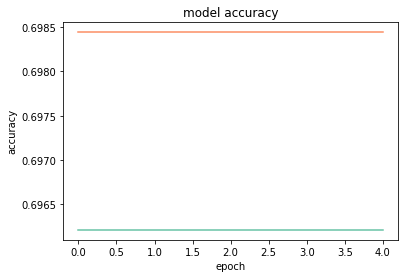

In [41]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

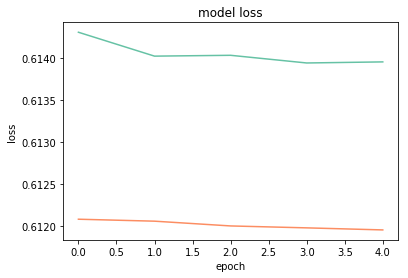

In [42]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [43]:
##NNET Test Prediction

accrsig = model.evaluate(x_test2,y_test2)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accrsig[0],accrsig[1]))

57927/57927 [==============================] - 4s 70us/step
Test set
  Loss: 0.613
  Accuracy: 0.698


In [44]:
# predict probabilities for test set
yhat_probs = model.predict(x_test2, verbose=0)
# predict classes for test set
yhat_classes = model.predict_classes(x_test2, verbose=0)

In [45]:
#from https://www.aiproblog.com/index.php/2019/03/28/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [46]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test2, yhat_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17509
           1       0.70      1.00      0.82     40418

   micro avg       0.70      0.70      0.70     57927
   macro avg       0.35      0.50      0.41     57927
weighted avg       0.49      0.70      0.57     57927



C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
##Decision Tree

from sklearn.tree import DecisionTreeClassifier

best_score=0

for max_depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train_scale, y_train)
    score=tree.score(X_validate_scale, y_validate)
    if score > best_score:
        best_score = score
        best_parameters= {'max_depth': max_depth}
            
tree= DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval_scale, y_trainval)
test_score=tree.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.70
Best paramters:  {'max_depth': 2}
Test set score with best parameters: 0.69


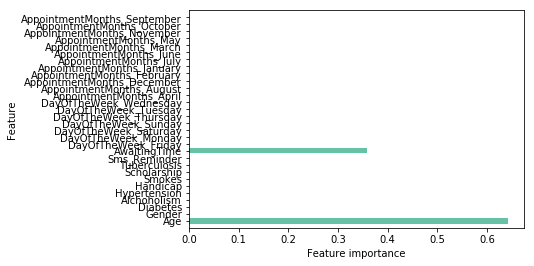

In [97]:
def plot_features_importances(model):
    n_features=X_train.shape[1]
    feature_names=list(X_train)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_features_importances(tree)

In [98]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_tree=tree.predict(X_test_scale)
print(confusion_matrix(y_test, pred_tree))

[[    0 17669]
 [    0 40258]]


In [99]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.69      1.00      0.82     40258

   micro avg       0.69      0.69      0.69     57927
   macro avg       0.35      0.50      0.41     57927
weighted avg       0.48      0.69      0.57     57927



C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
##Random Forest

from sklearn.ensemble import RandomForestClassifier

best_score=0

for max_depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [10, 100, 1000, 10000]:
        forest=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        forest.fit(X_train_scale, y_train)
        score=forest.score(X_validate_scale, y_validate)
        if score > best_score:
            best_score = score
            best_parameters= {'max_depth': max_depth, 'n_estimators': n_estimators}
            
forest=RandomForestClassifier(**best_parameters)
forest.fit(X_trainval_scale, y_trainval)
test_score=forest.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.70
Best paramters:  {'max_depth': 8, 'n_estimators': 10}
Test set score with best parameters: 0.70


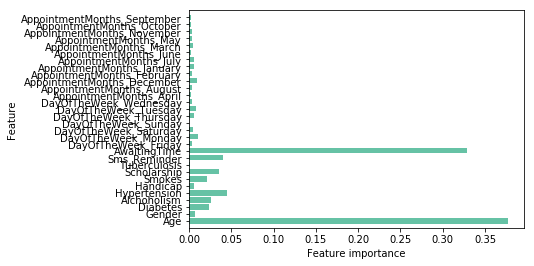

In [89]:
def plot_features_importances(model):
    n_features=X_train.shape[1]
    feature_names=list(X_train)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_features_importances(forest)

In [90]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_forest=forest.predict(X_test_scale)
print(confusion_matrix(y_test, pred_forest))

[[   30 17639]
 [   22 40236]]


In [91]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.58      0.00      0.00     17669
           1       0.70      1.00      0.82     40258

   micro avg       0.70      0.70      0.70     57927
   macro avg       0.64      0.50      0.41     57927
weighted avg       0.66      0.70      0.57     57927



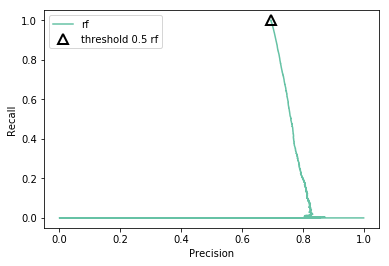

In [95]:
from sklearn.ensemble import RandomForestClassifier

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, forest.predict_proba(X_test_scale)[:, 1])

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [23]:
#XGBOOST

import xgboost as xgb

best_score=0

for n_estimators in [100, 500, 1000]:
    for learning_rate in [0.01, 0.05, 0.5]:
        for max_depth in [3, 4, 5]:
            for subsample in [0.5, 0.75, 1]:
                for gamma in [0, 1, 5]:
                    for colsample_bytree in [0.1, 0.5, 1]:                 
                        XGB2=xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, gamma=gamma, colsample_bytree=colsample_bytree, subsample=subsample, random_state=1)
                        XGB2.fit(X_train_scale, y_train)
                        score=XGB2.score(X_validate_scale, y_validate)
                        print(score)
                        if score > best_score:            
                            best_score = score            
                            best_parameters= {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'gamma': gamma, 'colsample_bytree': colsample_bytree, 'subsample': subsample, 'random_state': 1 }

    
             
XGB2.fit(X_trainval_scale, y_trainval)
test_score=XGB2.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965093395021233
0.6965611297172254
0.6965093395021233
0.6965093395021233
0.6965611297172254
0.6965093395021233
0.6965093395021233
0.6965611297172254
0.6965093395021233
0.6965093395021233
0.6966301833373615
0.6965093395021233
0.6965093395021233
0.6966301833373615
0.6965093395021233
0.6965093395

0.6962158616165453
0.6880330076304251
0.685995925836412
0.6964920760970894
0.6878603735800849
0.6872906812139626
0.6970962952732797
0.6921071712184511
0.6912440009667506
0.6969927148430757
0.6914856886372268
0.6872216275938267
0.6966474467423954
0.6913993716120568
0.6891206021475675
0.6971653488934157
0.695922383730967
0.6944032040879743
0.6970272416531437
0.6922625418637572
0.6913648448019888
0.6967165003625315
0.6959914373511031
0.6953699547698788
0.6971135586783137
0.6969581880330076
0.6973207195387218
0.6961640714014432
0.6829230397403584
0.6787107689120602
0.6955771156302869
0.6827849325000863
0.678158339950972
0.6966992369574975
0.6915547422573628
0.688084797845527
0.695767013085661
0.684079687877637
0.6812484894520595
0.6965783931222594
0.6851327555847115
0.6814901771225357
0.6969236612229396
0.6932983461657978
0.6915029520422609
0.6973207195387218
0.6887580706418533
0.6839933708524669
0.6967855539826675
0.6916928494976349
0.6962676518316473
0.6968200807927356
0.6963021786417153

In [24]:
XGB2.fit(X_trainval_scale, y_trainval)
test_score=XGB2.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.70
Best paramters:  {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.5, 'subsample': 0.5, 'random_state': 1}
Test set score with best parameters: 0.69


In [25]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_XGB2=XGB2.predict(X_test_scale)
print(confusion_matrix(y_test, pred_XGB2))

[[  494 17220]
 [  471 39742]]


In [26]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_XGB2))

              precision    recall  f1-score   support

           0       0.51      0.03      0.05     17714
           1       0.70      0.99      0.82     40213

   micro avg       0.69      0.69      0.69     57927
   macro avg       0.60      0.51      0.44     57927
weighted avg       0.64      0.69      0.58     57927



In [85]:
##KNN

from sklearn.neighbors import KNeighborsClassifier

best_score=0

for n_neighbors in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scale, y_train)
    score=knn.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'n_neighbors': n_neighbors}
            
knn= KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval_scale, y_trainval)
test_score=knn.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))
    

Best score on validation set: 0.66
Best paramters:  {'n_neighbors': 9}
Test set score with best parameters: 0.66


In [86]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_knn=knn.predict(X_test_scale)
print(confusion_matrix(y_test, pred_knn))

[[ 2809 14860]
 [ 4706 35552]]


In [87]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.37      0.16      0.22     17669
           1       0.71      0.88      0.78     40258

   micro avg       0.66      0.66      0.66     57927
   macro avg       0.54      0.52      0.50     57927
weighted avg       0.60      0.66      0.61     57927



In [82]:
##logistic regression

from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf=LogisticRegression(C=C)
    clf.fit(X_train_scale, y_train)
    score=clf.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf= LogisticRegression(**best_parameters)
clf.fit(X_trainval_scale, y_trainval)
test_score=clf.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score on validation set: 0.70
Best paramters:  {'C': 0.001}
Test set score with best parameters: 0.69


In [83]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf.predict(X_test_scale)
print(confusion_matrix(y_test, pred_clf))

[[    0 17669]
 [    0 40258]]


In [84]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.69      1.00      0.82     40258

   micro avg       0.69      0.69      0.69     57927
   macro avg       0.35      0.50      0.41     57927
weighted avg       0.48      0.69      0.57     57927



C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
##Naive Bayes

from sklearn.naive_bayes import GaussianNB


bay= GaussianNB()
bay.fit(X_train_scale, y_train)
best_score=bay.score(X_validate_scale, y_validate)

            
bay.fit(X_trainval_scale, y_trainval)
test_score=bay.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
#print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.66
Best paramters:  {'max_depth': 7, 'n_estimators': 10}
Test set score with best parameters: 0.65


In [80]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_bay=bay.predict(X_test_scale)
print(confusion_matrix(y_test, pred_bay))

[[ 3815 13854]
 [ 6369 33889]]


In [81]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_bay))

              precision    recall  f1-score   support

           0       0.37      0.22      0.27     17669
           1       0.71      0.84      0.77     40258

   micro avg       0.65      0.65      0.65     57927
   macro avg       0.54      0.53      0.52     57927
weighted avg       0.61      0.65      0.62     57927



### Feature Selection
RFE


In [111]:
from sklearn.feature_selection import RFE


clf=LogisticRegression()
# create the RFE model and select 10 attributes
select = RFE(clf, 10)
select.fit(X_train_scale, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[ True False False  True False False  True  True  True  True  True False
 False  True False False False False False False  True False False  True
 False False False False False False]
[ 1 21 14  1 13 17  1  1  1  1  1  6 16  1 15  4  3  5  2  8  1 18  7  1
 19 12  9 10 20 11]


([], <a list of 0 Text yticklabel objects>)

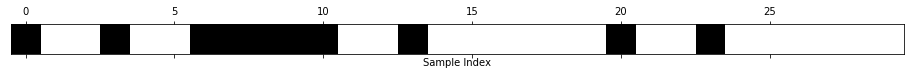

In [112]:
import matplotlib.pyplot as plt

mask=select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [113]:
X_train_rfe=select.transform(X_train_scale)
X_test_rfe=select.transform(X_test_scale)
X_validate_rfe=select.transform(X_validate_scale)
X_trainval_rfe=select.transform(X_trainval_scale)


In [114]:
print("X_train_RFE Shape: {}".format(X_train_rfe.shape))

X_train_RFE Shape: (173778, 10)


In [151]:
##logistic regression RFE

from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf=LogisticRegression(C=C)
    clf.fit(X_train_rfe, y_train)
    score=clf.score(X_validate_rfe, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf= LogisticRegression(**best_parameters)
clf.fit(X_trainval_rfe, y_trainval)
test_score=clf.score(X_test_rfe, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score on validation set: 0.70
Best paramters:  {'C': 0.01}
Test set score with best parameters: 0.69


In [153]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf.predict(X_test_rfe)
print(confusion_matrix(y_test, pred_clf))

[[  112 17557]
 [  158 40100]]


In [119]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.52      0.00      0.00     17669
           1       0.70      1.00      0.82     40258

   micro avg       0.70      0.70      0.70     57927
   macro avg       0.61      0.50      0.41     57927
weighted avg       0.64      0.70      0.57     57927



### Feature Selection
L1 reg

In [120]:
##logistic l1 reg

from sklearn.feature_selection import SelectFromModel


from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf_l1=LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l1.fit(X_train_scale, y_train)
    score=clf_l1.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf_l1= LogisticRegression(**best_parameters, penalty='l1', tol=0.01, solver='saga')
clf_l1.fit(X_trainval_scale, y_trainval)
test_score=clf_l1.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.70
Best paramters:  {'C': 0.001}
Test set score with best parameters: 0.69


In [123]:
result=clf_l1.fit(X_trainval_scale, y_trainval)
print(result.coef_)

[[ 0.63846454  0.          0.          0.          0.03171184  0.
   0.         -0.01337781  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


In [124]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf_l1.predict(X_test_scale)
print(confusion_matrix(y_test, pred_clf))

[[    0 17669]
 [    0 40258]]


In [125]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.69      1.00      0.82     40258

   micro avg       0.69      0.69      0.69     57927
   macro avg       0.35      0.50      0.41     57927
weighted avg       0.48      0.69      0.57     57927



C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Retooling Varibles

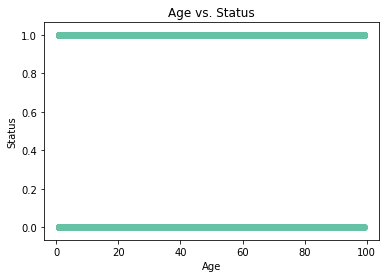

In [157]:
plt.scatter(data.Age, data.Status)
plt.title('Age vs. Status')
plt.xlabel('Age')
plt.ylabel('Status')
plt.show()

In [172]:
# There is non-linear trend in no shows for age, therefore we bin by age 
bins = [0,17,25,34,40,60,80,120]
labels=['0-17', '18-25', '26-34', '35-40', '41-60', '61-80', '81+']
data['age_cat'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
pd.crosstab([data.age_cat],data.Status, margins=False)

Status,0,1
age_cat,,
0-17,20915,39367
18-25,11135,18145
26-34,12626,23403
35-40,7889,16118
41-60,23215,62355
61-80,10313,37030
81+,1676,5444


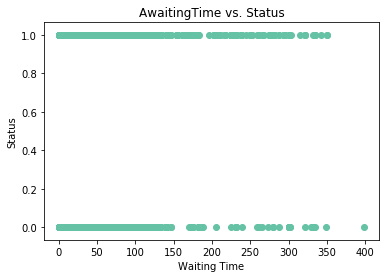

In [160]:
plt.scatter(data.AwaitingTime, data.Status)
plt.title('AwaitingTime vs. Status')
plt.xlabel('Waiting Time')
plt.ylabel('Status')
plt.show()

In [37]:
bins = [-1,0,2,7,30,90,150,400]
labels=['0', '1-2', '3-7', '8-30', '31-90', '91-150', '150+']
data['wait_cat'] = pd.cut(data['AwaitingTime'], bins=bins, labels=labels, right=True)
pd.crosstab([data.wait_cat],data.Status, margins=False)

Status,0,1
wait_cat,,
1-2,13987,43468
3-7,22620,60524
8-30,39899,77940
31-90,10780,18809
91-150,442,1012
150+,41,109


In [163]:
from sklearn.model_selection import cross_validate
y = data.Status
X = data.drop(columns=['Age', 'AwaitingTime', 'Status', 'AppointmentRegistration', 'AppointmentData', 'DayOfTheWeek', 'AppointmentMonths', 'Tuberculosis'], axis=1)

##Dummy code the Age and Wait time categorical Variables


X=pd.get_dummies(X, columns=['age_cat', 'wait_cat'], prefix=['age_cat', 'wait_cat'])


In [30]:
from sklearn.model_selection import cross_validate
y = data.Status
X = data.drop(columns=['Status', 'Gender', 'Handicap', 'AppointmentRegistration', 'AppointmentData', 'DayOfTheWeek', 'AppointmentMonths', 'Tuberculosis', 'Diabetes'], axis=1)

#X=pd.get_dummies(X, columns=['wait_cat'], prefix=['wait_cat'])

#X = X.drop(columns=['AwaitingTime'], axis=1)

X.head()

,Age,Alchoholism,Hypertension,Smokes,Scholarship,Sms_Reminder,AwaitingTime
0,19,0,0,0,0,0,29
1,24,0,0,0,0,0,1
2,4,0,0,0,0,0,1
3,5,0,0,0,0,1,15
4,38,0,0,0,0,1,6


In [33]:
##Split into train, test, and validate

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,train_size=0.8)


#splitting data into 60% as train/20% as test/20% as validate
X_validate, X_train, y_validate, y_train  = train_test_split(X_trainval, y_trainval, train_size=0.25)

In [34]:
#Shape of train/test/Validate data
print(X_test.shape)
print(X_validate.shape)
print(X_train.shape)

(57927, 7)
(57926, 7)
(173778, 7)


In [35]:
##Scaler transformation of the x variables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scale=scaler.fit_transform(X_train)
X_trainval_scale=scaler.fit_transform(X_trainval)
X_validate_scale=scaler.fit_transform(X_validate)
X_test_scale=scaler.fit_transform(X_test)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

In [38]:
from sklearn.ensemble import BaggingClassifier
#ds = DecisionTreeClassifier(criterion='entropy',max_depth=4)
bag = BaggingClassifier(max_samples=1.0,bootstrap=True)
bag.fit(X_train_scale, y_train)
bag.score(X_validate_scale, y_validate)

0.6597210233746504

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation=KFold(n_splits=5,shuffle=True,random_state=1)
GBC=GradientBoostingClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,3,5],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBC,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [42]:
search.fit(X_trainval_scale, y_trainval)
search.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

In [44]:

best_score=0

for n_estimators in [500, 1000, 2000]:
    for learning_rate in [0.001, 0.01, 0.5, 1]:
        for max_depth in [1, 3, 5]:
            for subsample in [0.5, 0.75, 1]:
                GBC=GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample, random_state=1)
                GBC.fit(X_train_scale, y_train)
                score=GBC.score(X_validate_scale, y_validate)
                if score > best_score:            
                    best_score = score            
                    best_parameters= {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'subsample': subsample, 'random_state': 1 }

    
             
GBC.fit(X_trainval_scale, y_trainval)
test_score=GBC.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.70
Best paramters:  {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.75, 'random_state': 1}
Test set score with best parameters: 0.68


In [49]:
#XGBOOST

import xgboost as xgb

best_score=0

for n_estimators in [100, 500, 1000]:
    for learning_rate in [0.001, 0.01, 0.05, 0.5]:
        for max_depth in [1, 3, 4, 5]:
            for subsample in [0.5, 0.75, 1]:
                for gamma in [0, 1, 5]:
                    for colsample_bytree in [0.1, 0.5, 1,]:                 
                        XGB2=xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, gamma=gamma, colsample_bytree=colsample_bytree, subsample=subsample, random_state=1)
                        XGB2.fit(X_train_scale, y_train)
                        score=XGB2.score(X_validate_scale, y_validate)
                        if score > best_score:            
                            best_score = score            
                            best_parameters= {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'gamma': gamma, 'colsample_bytree': colsample_bytree, 'subsample': subsample, 'random_state': 1 }

    
             
XGB2.fit(X_trainval_scale, y_trainval)
test_score=XGB2.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.70
Best paramters:  {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1, 'subsample': 0.75, 'random_state': 1}
Test set score with best parameters: 0.70


In [44]:
##Naive Bayes

from sklearn.naive_bayes import GaussianNB


bay= GaussianNB()
bay.fit(X_train_scale, y_train)
best_score=bay.score(X_validate_scale, y_validate)

            
bay.fit(X_trainval_scale, y_trainval)
test_score=bay.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
#print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.66
Test set score with best parameters: 0.65


In [45]:
##logistic regression

from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf=LogisticRegression(C=C)
    clf.fit(X_train_scale, y_train)
    score=clf.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf= LogisticRegression(**best_parameters)
clf.fit(X_trainval_scale, y_trainval)
test_score=clf.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score on validation set: 0.70
Best paramters:  {'C': 0.01}
Test set score with best parameters: 0.70


In [170]:
##Random Forest

from sklearn.ensemble import RandomForestClassifier

best_score=0

for max_depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [10, 100, 1000, 10000]:
        forest=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        forest.fit(X_train_scale, y_train)
        score=forest.score(X_validate_scale, y_validate)
        if score > best_score:
            best_score = score
            best_parameters= {'max_depth': max_depth, 'n_estimators': n_estimators}
            
forest=RandomForestClassifier(**best_parameters)
forest.fit(X_trainval_scale, y_trainval)
test_score=forest.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.70
Best paramters:  {'max_depth': 9, 'n_estimators': 100}
Test set score with best parameters: 0.70
